In [8]:
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

In [86]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV

df_housing = pd.read_csv('./AmesHousing.csv')
df_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df_housing.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [61]:
X = df_housing.drop(['SalePrice', 'Order', 'PID'], axis = 1)
y = df_housing['SalePrice']

In [100]:
num_transformer = Pipeline(
    [("imputer", SimpleImputer(strategy='mean')),
     ("scaler", StandardScaler())]
)

cat_transformer = Pipeline(
    [("impute", SimpleImputer(strategy='constant', fill_value="UNK")),
     ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output = False))]
)

ct = ColumnTransformer(
    [('num', num_transformer, make_column_selector(dtype_include=np.number)),
     ('cat', cat_transformer, make_column_selector(dtype_include=object))],
    remainder="passthrough"
)

pipeline_lr = Pipeline(
    [("preprocessing", ct),
     ("lr", LinearRegression())]
)

pipeline_ridge = Pipeline(
    [("preprocessing", ct),
     ("ridge", Ridge(alpha=1.0))]
)

pipeline_lasso = Pipeline(
    [("preprocessing", ct),
     ("lasso", Lasso(alpha=1.0, max_iter=10000))]
)

pipeline_elastic = Pipeline(
    [("preprocessing", ct),
     ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000))]
)

In [88]:
scores = cross_val_score(pipeline_lr, X, y, cv=5, scoring='r2')
print(f"R-squared for Linear Regression: {scores.mean()}")
scores = cross_val_score(pipeline_ridge, X, y, cv=5, scoring='r2')
print(f"R-squared for Ridge Regression: {scores.mean()}")
scores = cross_val_score(pipeline_lasso, X, y, cv=5, scoring='r2')
print(f"R-squared for Lasso Regression: {scores.mean()}")
scores = cross_val_score(pipeline_elastic, X, y, cv=5, scoring='r2')
print(f"R-squared for Elastic Net Regression: {scores.mean()}")

R-squared for Linear Regression: -2.3343370108509317e+18
R-squared for Ridge Regression: 0.8653236700853674
R-squared for Lasso Regression: 0.856390257498186
R-squared for Elastic Net Regression: 0.8339288010437084


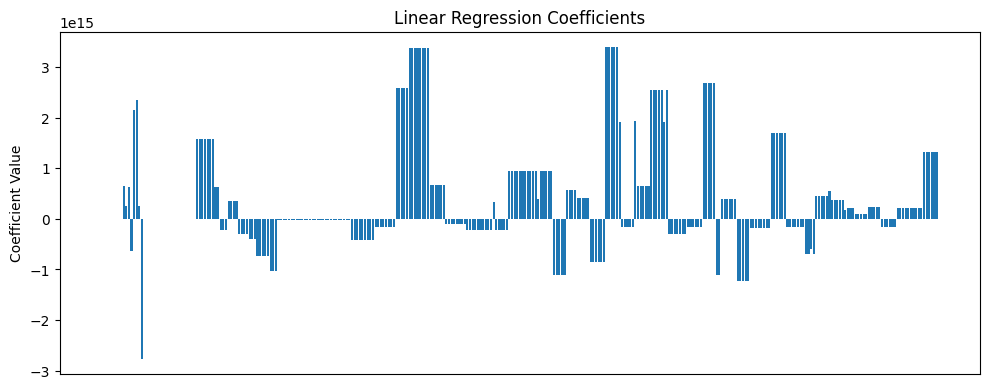

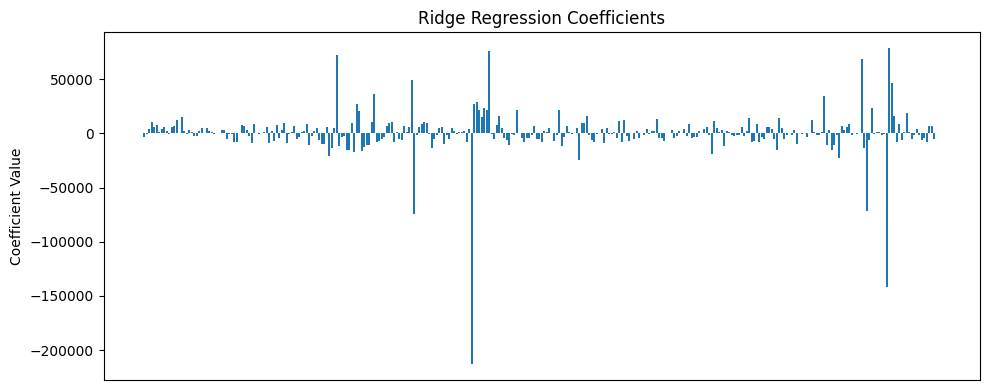

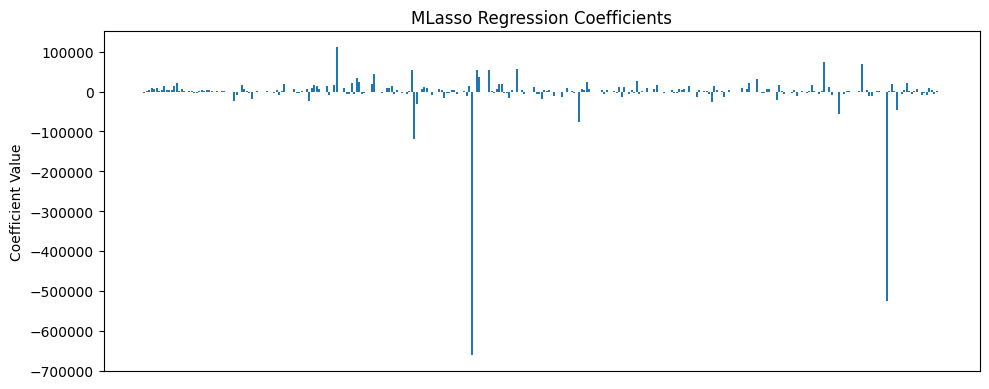

In [89]:
import matplotlib.pyplot as plt

pipeline_lr.fit(X, y)
coef_lr = pipeline_lr.named_steps['lr'].coef_

pipeline_ridge.fit(X, y)
coef_ridge = pipeline_ridge.named_steps['ridge'].coef_

pipeline_lasso.fit(X, y)
coef_lasso = pipeline_lasso.named_steps['lasso'].coef_

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_lr)), coef_lr)
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_ridge)), coef_ridge)
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_lasso)), coef_lasso)
plt.title('MLasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

In [95]:
alpha_values = [0.001, 0.01, 0.1, 1, 10]

alphas = {'ridge__alpha': alpha_values}

gscv = GridSearchCV(pipeline_ridge, alphas, cv=5, scoring='r2')
gscv.fit(X, y)

best_alpha = gscv.best_params_['ridge__alpha']
best_score = gscv.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best R-squared: {best_score}")

Best alpha: 10
Best R-squared: 0.8671845079604449


In [96]:
alphas = {'lasso__alpha': alpha_values}

gscv = GridSearchCV(pipeline_lasso, alphas, cv=5, scoring='r2')
gscv.fit(X, y)

best_alpha = gscv.best_params_['lasso__alpha']
best_score = gscv.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best R-squared: {best_score}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+11, tolerance: 1.414e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best alpha: 10
Best R-squared: 0.8662401129784489


In [105]:
params = {
    "elastic__alpha": [0.001, 0.01, 0.1, 1, 10],
    "elastic__l1_ratio": [0.0, 0.25, 0.5, 0.75, 1.0]
}

gscv = GridSearchCV(pipeline_elastic, params, cv=5, scoring='r2')
gscv.fit(X, y)

best_alpha = gscv.best_params_['elastic__alpha']
best_l1_ratio = gscv.best_params_['elastic__l1_ratio']
best_score = gscv.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"Best R-squared: {best_score}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.187e+11, tolerance: 1.414e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.885e+11, tolerance: 1.534e+09 Linear regression models with null weight for the l1 regularization term are mor

Best alpha: 0.01
Best l1_ratio: 0.75
Best R-squared: 0.8672976955971959
